In [2]:
!pip install arch==6.3.0

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # acf plot 및 pacf plot을 그리기 위한 라이브러리
from statsmodels.tsa.arima_model import ARIMA # ARIMA 모델
import pmdarima as pm # Auto ARIMA 모델

In [4]:
ap = pd.read_csv('/aiffel/aiffel/time_series_basic/AirPassengers.csv')
ap.drop('Month', axis = 1, inplace = True)

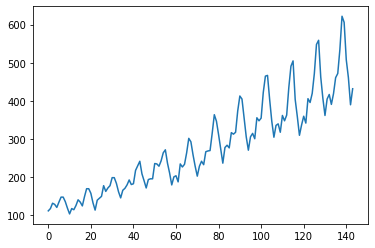

In [5]:
plt.plot(ap)
plt.show()

In [6]:
## Log transformation
ap_transformed = np.log1p(ap)

In [7]:
ap_transformed

,#Passengers
0,4.727388
1,4.779123
2,4.890349
3,4.867534
4,4.804021
...,...
139,6.408529
140,6.232448
141,6.135565
142,5.968708


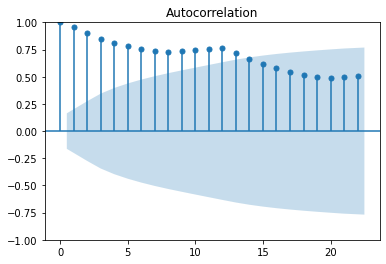

In [8]:
plot_acf(ap_transformed) # acf plot, 점차 감소하는 모양새를 지니고 있음
plt.plot();

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


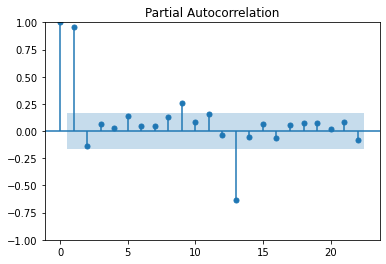

In [9]:
plot_pacf(ap_transformed) # pacf plot, lag 2까지 유의미한 결과를 보임
plt.plot();

### 차분을 통해 분석하기

In [10]:
ap_diff = ap_transformed.diff()
ap_diff = ap_diff.dropna()

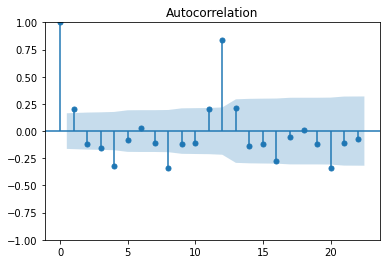

In [13]:
# lag 1과 lag 12에서 유의미한 lag가 포착됨
plot_acf(ap_diff)
plt.plot();

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


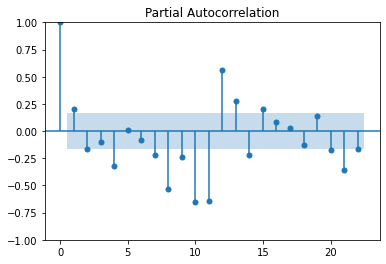

In [14]:
# lag 1, lag 8~12쯤에서 유의미한 lag가 포착됨
plot_pacf(ap_diff)
plt.plot();

### acf와 pacf에서 n=12쯤 유의미한 상관관계 발생. 이는 전에 보았던 계절성 성분으로 추측

### auto-arima를 적합 시 계절성을 고려하도록 해야함

### ARIMA를 적합할 때 계절성 요인도 고려해야함

In [15]:
ap_transformed

,#Passengers
0,4.727388
1,4.779123
2,4.890349
3,4.867534
4,4.804021
...,...
139,6.408529
140,6.232448
141,6.135565
142,5.968708


In [16]:
## 향후 test에 활용할 부분 분리
train_size = int(len(ap_transformed)*0.8)

ap_transformed_train = ap_transformed[:train_size]
ap_transformed_test = ap_transformed[train_size:]

In [18]:
# AutoARIMA로 모델 적합
# seasonal = True, max_D(계절차분) = 12
model = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_D = 12, D = 12)
res = model.fit(ap_transformed_train) ## 여기서는 5,1,2가 best네?

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-215.001, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-190.829, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-192.148, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-193.761, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-191.052, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-217.311, Time=1.01 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-215.533, Time=0.97 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-220.060, Time=1.19 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-201.740, Time=0.68 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-220.235, Time=1.52 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-199.740, Time=1.39 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-215.718, Time=1.63 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=i

In [22]:
# confidence interval까지 도출
preds, conf_int = res.predict(n_periods=ap_transformed_test.shape[0], return_conf_int=True) 

In [23]:

# 아래의 코드 결과값을 서로 비교 분석해봅시다.
print(preds.shape) 
print(type(preds))
print('--'*40)
print(preds.shape[0])
print(type(preds.shape[0]))
print('--'*40)
print(preds)
print('--'*40)
print(conf_int)

(29,)
<class 'numpy.ndarray'>
--------------------------------------------------------------------------------
29
<class 'int'>
--------------------------------------------------------------------------------
[6.19809774 6.19806857 6.10700886 6.04934938 6.10830304 6.11855195
 6.11342101 6.1594342  6.12936818 6.09209851 6.13097087 6.11806316
 6.09861148 6.14204855 6.12652356 6.09953875 6.13593558 6.12223541
 6.09910794 6.13638588 6.12477792 6.10110116 6.13499691 6.12401754
 6.10118303 6.13389845 6.12458709 6.10237174 6.13308145]
--------------------------------------------------------------------------------
[[6.03134498 6.3648505 ]
 [5.91619635 6.4799408 ]
 [5.7357442  6.47827352]
 [5.63035752 6.46834123]
 [5.66867886 6.54792723]
 [5.66170438 6.57539952]
 [5.63327579 6.59356622]
 [5.65353843 6.66532997]
 [5.59324119 6.66549517]
 [5.52623642 6.6579606 ]
 [5.5432783  6.71866344]
 [5.51005038 6.72607595]
 [5.46953632 6.72768663]
 [5.49438271 6.78971439]
 [5.45868164 6.79436548]
 [5.410179

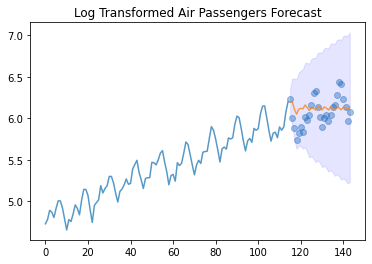

In [24]:
# 예측 성능을 시각화합니다. 
# 0. train과 test data를 축(axis)으로 만들었습니다.
# 1. x축은 test으로 만들어 놓은 train data를 사용하고, y축에 train data를 사용하여 train data를 시각화 합니다.
# 2. 1번 그래프에서 정답(AutoARIMA를 통해 만든 예측 값)에 해당하는 일자형 그래프가 생성됩니다.
# 3. 원래 가지고 있던 데이터셋의 y값(지도 학습의 정답)을 산점도(scatter plot)로 생성합니다.
# 4. 2, 3번의 분포에 해당하는 구간을 채워 그래프로 나타냈습니다.
x_axis = np.arange(ap_transformed_train.shape[0] + preds.shape[0]) # 115 + 29, plot을 그리기 위해 x축을 생성합니다. # 0
plt.plot(x_axis[:ap_transformed_train.shape[0]],ap_transformed_train, alpha=0.75) # 1
plt.plot(x_axis[ap_transformed_train.shape[0]:], preds, alpha=0.75) # 2
plt.scatter(x_axis[ap_transformed_train.shape[0]:],ap_transformed_test, 
            alpha=0.4, marker='o')  # 3 기존 test data는 scatter
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b') # 4
plt.title("Log Transformed Air Passengers Forecast") # plot의 제목
plt.show() # 4개의 plot을 시각화 합니다.

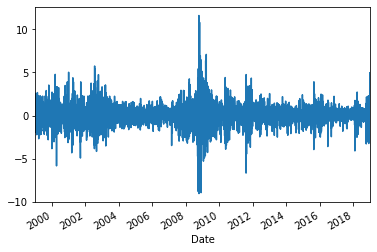

In [25]:
## ARCH 모델 실습
# ⑦-1 : 데이터 및 라이브러리 불러오기 
import datetime as dt # 날짜와 시간을 조작할 수 있는 Python 라이브러리 입니다 .
import arch.data.sp500 # S&P 500 데이터셋을 arch에서 불러옵니다.

# ⑦-2 : 필요한 데이터로 가공하고 시각화를 통해 확인하기
st = dt.datetime(2002, 1, 1) # start date
en = dt.datetime(2022, 1, 1) # end date
data = arch.data.sp500.load() # s&p 500 데이터 불러오기
market = data["Adj Close"] # 종가만 활용
returns = 100 * market.pct_change().dropna() # return값으로 변환
ax = returns.plot() # 수익률을 그래프로 만들기
xlim = ax.set_xlim(returns.index.min(), returns.index.max()) # xlim은 x축 값의 보기를 제한 합니다. 
plt.show()

## 강의에서 언급한 바와 같이, 조건부 이분산성이 나타남.

In [26]:
# ⑦-3 : ARCH 모델 적용
from arch import arch_model

am = arch_model(returns) # return을 arch모델에 적합
res = am.fit(update_freq=5)

# ⑦-4 : 지표를 통한 결과 확인
print(res.summary())
# 다양한 결과가 제시되어있으나, 수업때 배웠던 p-value, AIC, BIC위주로 내용을 파악
# 아래에 있는 volatility model을 보면 alpha[1], Beta[1]은 GARCH(1,1)을 의미하며, p-value를 통해 신뢰도 95%에서 이들이 유의미함을 도출

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.2765831170655
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988985
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Mon, Jul 29 2024   Df Residuals:                     5029
Time:         

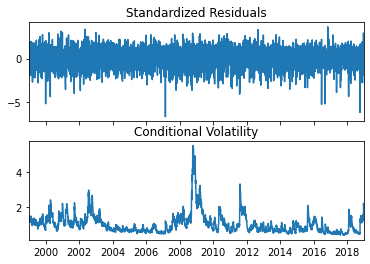

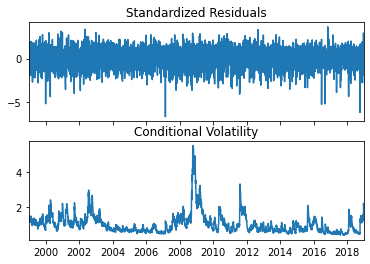

In [27]:
# ⑦-5 : 시각화를 통한 결과값 확인
res.plot()

In [ ]:
## 모델 적합 후 남은 잔차(Residual)와 포착한 조건부 변동성(conditional volatility)을 시각적으로 확인 가능.